<a href="https://colab.research.google.com/github/Cepera90/FB/blob/RFR_data%2B/FB_RFR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [32]:
def csv1(path):
  df = pd.read_csv(path, index_col = 'Дата', 
                   parse_dates=True, quotechar='"', 
                   decimal=",", dayfirst=True)
  df = df.sort_values(by="Дата",
               ascending=True)
  df['Объём'] = [x.replace(',', '.').replace('M', '000000') for x in df['Объём']]
  df['Изм. %'] = [x.replace('+', '').replace('%', '').replace(',', '.') for x in df['Изм. %']]
  df.loc['2012-05-18':,'Цена':'Изм. %'] = df.loc['2012-05-18':,'Цена':'Изм. %'].astype(float)
  return df

In [33]:
df1 = csv1('/content/FB.csv')

In [34]:
df1

,Цена,Откр.,Макс.,Мин.,Объём,Изм. %
Дата,,,,,,
2012-05-18,38.23,42.05,45.00,38.00,580.59,-57.62
2012-05-21,34.03,36.53,36.66,33.00,168.31,-10.99
2012-05-22,31.00,32.61,33.59,30.94,102.05,-8.90
2012-05-23,32.00,31.37,32.50,31.36,73.72,3.23
2012-05-24,33.03,32.95,33.21,31.77,50.28,3.22
...,...,...,...,...,...,...
2022-01-10,328.07,325.31,328.34,315.43,24.83,-1.12
2022-01-11,334.37,326.78,334.63,325.28,16.19,1.92
2022-01-12,333.26,335.18,336.36,330.03,14.10,-0.33


In [35]:
def csv2(path):
  df = pd.read_csv(path, index_col = 'Дата', 
                   parse_dates=True, quotechar='"', 
                  dayfirst=True)
  df = df.sort_values(by="Дата",
               ascending=True)
  df['Объём'] = [x.replace(',', '.').replace('M', '000000').replace('B', '000000000') for x in df['Объём']]
  df['Откр.'] = [x.replace(',', '') for x in df['Откр.']]
  df['Макс.'] = [x.replace(',', '') for x in df['Макс.']]
  df['Мин.'] = [x.replace(',', '') for x in df['Мин.']]
  df['Изм. %'] = [x.replace('+', '').replace('%', '').replace(',', '.') for x in df['Изм. %']]
  df['Цена'] = [x.replace(',', '') for x in df['Цена']]
  df.loc['2012-05-18':,'Цена':'Изм. %'] = df.loc['2012-05-18':,'Цена':'Изм. %'].astype(float)
  return df

In [36]:
df2 = csv2('/content/NASDAQ Composite.csv')

In [37]:
df2

,Цена,Откр.,Макс.,Мин.,Объём,Изм. %
Дата,,,,,,
2012-05-18,2.7788,2.8144,2.8273,2.7744,582.49,-1.24
2012-05-21,2.8472,2.7826,2.8488,2.7748,486.21,2.46
2012-05-22,2.8391,2.8539,2.8673,2.8232,467.04,-0.29
2012-05-23,2.8501,2.8322,2.8554,2.7955,499.20,0.39
2012-05-24,2.8394,2.8566,2.8582,2.8176,462.11,-0.38
...,...,...,...,...,...,...
2022-01-10,14.9428,14.7518,14.9539,14.5302,1.09,0.05
2022-01-11,15.1534,14.9193,15.1587,14.8376,863.02,1.41
2022-01-12,15.1884,15.2631,15.3190,15.1173,840.02,0.23


In [39]:
df = pd.merge(df1, df2, on='Дата')
df

,Цена_x,Откр._x,Макс._x,Мин._x,Объём_x,Изм. %_x,Цена_y,Откр._y,Макс._y,Мин._y,Объём_y,Изм. %_y
Дата,,,,,,,,,,,,
2012-05-18,38.23,42.05,45.00,38.00,580.59,-57.62,2.7788,2.8144,2.8273,2.7744,582.49,-1.24
2012-05-21,34.03,36.53,36.66,33.00,168.31,-10.99,2.8472,2.7826,2.8488,2.7748,486.21,2.46
2012-05-22,31.00,32.61,33.59,30.94,102.05,-8.90,2.8391,2.8539,2.8673,2.8232,467.04,-0.29
2012-05-23,32.00,31.37,32.50,31.36,73.72,3.23,2.8501,2.8322,2.8554,2.7955,499.20,0.39
2012-05-24,33.03,32.95,33.21,31.77,50.28,3.22,2.8394,2.8566,2.8582,2.8176,462.11,-0.38
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-10,328.07,325.31,328.34,315.43,24.83,-1.12,14.9428,14.7518,14.9539,14.5302,1.09,0.05
2022-01-11,334.37,326.78,334.63,325.28,16.19,1.92,15.1534,14.9193,15.1587,14.8376,863.02,1.41
2022-01-12,333.26,335.18,336.36,330.03,14.10,-0.33,15.1884,15.2631,15.3190,15.1173,840.02,0.23


In [40]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0:1]

In [41]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
tuned_parameters = {'n_estimators': [500, 600, 700], 'min_samples_split': [3, 4, 5]}
clf = GridSearchCV(ensemble.RandomForestRegressor(), tuned_parameters)
clf.fit(Xtrain, ytrain.values.ravel())

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'min_samples_split': [3, 4, 5],
                         'n_estimators': [500, 600, 700]})

In [ ]:
clf.best_params_

{'min_samples_split': 4, 'n_estimators': 600}

In [42]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=600, min_samples_split=4)
forest.fit(Xtrain, ytrain.values.ravel())

RandomForestRegressor(min_samples_split=4, n_estimators=600)

In [43]:
from sklearn.metrics import r2_score
y_model = forest.predict(Xtest) 
r2_score_RFR = r2_score(ytest, y_model)
print("RFR R2 score", r2_score_RFR)

RFR R2 score 0.9997338458026738


In [44]:
ytest['Цена_прогноз'] = forest.predict(Xtest)

In [45]:
ytest = ytest.rename_axis('Дата').reset_index()
ytest = ytest.sort_values(by="Дата").reset_index(drop=True)

In [47]:
ytest

,Дата,Цена_x,Цена_прогноз
0,2012-05-21,34.03,35.402264
1,2012-05-29,28.84,30.543174
2,2012-06-01,27.72,28.240144
3,2012-06-04,26.90,26.611844
4,2012-06-05,25.87,26.690540
...,...,...,...
603,2021-12-23,335.24,332.853626
604,2021-12-27,346.18,341.699685
605,2021-12-28,346.22,349.749550
606,2022-01-03,338.54,340.021959


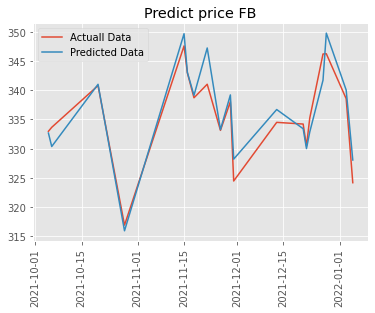

In [48]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(ytest["Дата"][589:], ytest["Цена_x"][589:], label='Actuall Data') #actual plot
plt.plot(ytest["Дата"][589:], ytest["Цена_прогноз"][589:], label='Predicted Data') #predicted plot
plt.xticks(rotation=90)
plt.title('Predict price FB')
plt.legend()
plt.show()

In [50]:
df1_new = csv1('/content/FB_new.csv')

In [51]:
df2_new = csv2('/content/NASDAQ Composite_new.csv')

In [52]:
df_new = pd.merge(df1_new, df2_new, on='Дата')
df_new

,Цена_x,Откр._x,Макс._x,Мин._x,Объём_x,Изм. %_x,Цена_y,Откр._y,Макс._y,Мин._y,Объём_y,Изм. %_y
Дата,,,,,,,,,,,,
2022-01-18,318.15,323.29,324.21,317.64,22.35,-4.14,14.5069,14.6818,14.7405,14.4829,1.06,-2.60
2022-01-19,319.59,319.58,327.10,319.33,20.56,0.45,14.3403,14.5822,14.6589,14.3317,935.06,-1.15
2022-01-20,316.56,323.90,327.82,315.98,16.65,-0.95,14.1540,14.4629,14.6420,14.1408,1.02,-1.30
2022-01-21,303.17,314.81,318.31,303.04,28.71,-4.23,13.7689,14.0462,14.1717,13.7642,1.32,-2.72
2022-01-24,308.71,297.84,309.53,289.01,38.20,1.83,13.8551,13.4815,13.8766,13.0947,1.55,0.63
2022-01-25,300.15,299.95,306.23,297.58,24.74,-2.77,13.5393,13.6109,13.7816,13.4141,1.04,-2.28
2022-01-26,294.63,307.01,307.51,290.85,28.18,-1.84,13.5421,13.8718,14.0027,13.3922,1.18,0.02
2022-01-27,299.65,297.97,301.63,294.79,4.65,1.70,13.3528,13.7110,13.7659,13.3227,1.07,-1.40


In [53]:
X_new = df_new.iloc[:, 1:]
y_new = df_new.iloc[:, 0:1]

In [54]:
from sklearn.metrics import r2_score
model_new = forest.predict(X_new) 
r2_score_RFR = r2_score(y_new, model_new)
print("RFR R2 score", r2_score_RFR)

RFR R2 score 0.6148139745474968


In [55]:
y_new['Цена_прогноз'] = forest.predict(X_new)
y_new = y_new.rename_axis('Дата').reset_index()
y_new = y_new.sort_values(by="Дата").reset_index(drop=True)
y_new

,Дата,Цена_x,Цена_прогноз
0,2022-01-18,318.15,324.280672
1,2022-01-19,319.59,324.147777
2,2022-01-20,316.56,324.942150
3,2022-01-21,303.17,310.169449
4,2022-01-24,308.71,305.728705
5,2022-01-25,300.15,301.964403
6,2022-01-26,294.63,302.070562
7,2022-01-27,299.65,298.047344


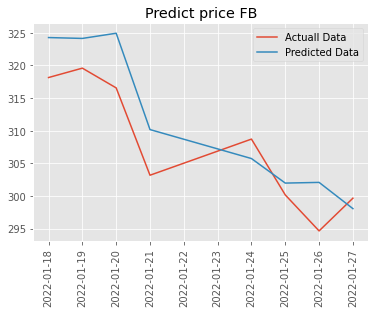

In [56]:
plt.style.use('ggplot')
plt.plot(y_new["Дата"], y_new["Цена_x"], label='Actuall Data') #actual plot
plt.plot(y_new["Дата"], y_new["Цена_прогноз"], label='Predicted Data') #predicted plot
plt.xticks(rotation=90)
plt.title('Predict price FB')
plt.legend()
plt.show()